# **How to build a longitudinal plot**

Prepare the notebook with the preambles for the inclusion of pandas, numpy and matplotlib.pyplot.
Import the data file (csv format) into Google Colab through the drive.mount command, import the pylorentz package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install gdown
import gdown

# real experimental data
# gammap_5GeV_PiPlusPiMinusProtWHel_gold2bG14.csv
url = 'https://drive.google.com/uc?id=1VkG1gYY4qnfqNz3MEUkOKDwcAW4EF4uR'

# Montecarlo generated data
# gen_gammap5GeV_PipPimP.csv
# url = 'https://drive.google.com/uc?id=11J0xaQLRMxzgQLXEhXZb_u4mnxp8RVPO'
# gen_gammap10GeV_PipPimP.csv
# url = 'https://drive.google.com/uc?id=1U_1bE3k2vT-uZwnmAgU9OVCku7oZjsMA'

output = 'gammapi_2pions_exclusivityCuts.dat'
gdown.download(url, output, quiet=False)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1VkG1gYY4qnfqNz3MEUkOKDwcAW4EF4uR
To: /content/gammapi_2pions_exclusivityCuts.dat
100%|██████████| 59.0M/59.0M [00:00<00:00, 66.8MB/s]


In [3]:
data.head()

,p1x,p1y,p1z,E1,p2x,p2y,p2z,E2,p3x,p3y,p3z,E3,pgamma,helGamma,
0,0.517085,0.161989,0.731173,0.920732,-0.254367,0.082889,0.495509,0.580189,-0.259266,-0.265152,0.445175,1.10275,1.657800,-1,
1,-0.216852,-0.245333,0.107538,0.371878,-0.183380,0.191897,0.145128,0.333213,0.389750,0.112110,0.790133,1.29195,1.044790,-1,
2,0.197931,0.071432,-0.010077,0.252778,-0.111780,-0.360482,0.367842,0.545221,-0.090228,0.302313,0.724911,1.22694,1.095470,-1,
3,-0.505371,-0.163949,0.450407,0.710395,-0.141057,0.282404,1.186530,1.235730,0.679497,-0.112014,0.729706,1.37371,2.388690,-1,
4,-0.200253,-0.221165,0.289284,0.438425,-0.160384,0.203285,0.051361,0.298667,0.350804,-0.023423,0.645083,1.19168,0.998451,-1,


In [4]:
! pip install pylorentz

In [5]:
import math
from pylorentz import Momentum4

Let's prepare the relevant arrays containing the 4-momenta kinematics of the three particle (plus the two in the intial state), both in the laboratory and in the center of mass reference systems:

In [6]:
data.columns = data.columns.str.strip()

In [7]:
# final state
p1T = np.sqrt(data.p1x**2+data.p1y**2)
p1mod = np.sqrt(p1T**2 + data.p1z**2)
eta1 = np.arcsinh(data.p1z/p1T)
phi1 = np.arctan2(data.p1y, data.p1x)
pionPlus = Momentum4.e_eta_phi_p(data.E1, eta1, phi1, p1mod)

p2T = np.sqrt(data.p2x**2+data.p2y**2)
p2mod = np.sqrt(p2T**2 + data.p2z**2)
eta2 = np.arcsinh(data.p2z/p2T)
phi2 = np.arctan2(data.p2y, data.p2x)
pionMinus = Momentum4.e_eta_phi_p(data.E2, eta2, phi2, p2mod)

p3T = np.sqrt(data.p3x**2+data.p3y**2)
p3mod = np.sqrt(p3T**2 + data.p3z**2)
eta3 = np.arcsinh(data.p3z/p3T)
phi3 = np.arctan2(data.p3y, data.p3x)
proton = Momentum4.e_eta_phi_p(data.E3, eta3, phi3, p3mod)

# initial state
# len is the number of events read by the csv file
len = data.pgamma.size
pgammaT = np.zeros(len)
pgammamod = data.pgamma
etagamma = 1.e11*np.ones(len)
phigamma = np.zeros(len)
massGamma = 0.
Egamma = np.sqrt(massGamma**2 + pgammamod**2)
gamma = Momentum4.e_eta_phi_p(Egamma, etagamma, phigamma, pgammamod)

# the target (proton) is at rest
massProton = 0.93827
ETgt = massProton*np.ones(len)
etaTgt = np.zeros(len)
phiTgt = np.zeros(len)
pTgt = np.zeros(len)
protonTarget =  Momentum4.e_eta_phi_p(ETgt, etaTgt, phiTgt, pTgt)

In [8]:
# 4-momenta in the scenter of mass system
centerOfMass = gamma + protonTarget

pionPlusCM = pionPlus.boost_particle(-centerOfMass)
pionMinusCM = pionMinus.boost_particle(-centerOfMass)
protonCM = proton.boost_particle(-centerOfMass)

gammaCM = gamma.boost_particle(-centerOfMass)
protonTargetCM = protonTarget.boost_particle(-centerOfMass)

A **longitudinal plot** (introduced for the first time by van Hove in 1969) offers a way to separate the contribution of different reaction production mechanisms. Inspecting a longitudinal plot may suggest particular selections in the longitudinal phase space which can help selecting specific reaction channels, enhancing for instance the contribution of meson versus baryon resonances.
They are based on the assumption that at sufficiently high center-of-mass energies the phase space is reflected mainly by the longitudinal components of the particle momenta, while the transverse components can be neglected. Longitudinal plots are a convenient way to visualize the reaction kinematics of a reaction with three particles in the final state, in the form of 2D scattering plots (for $n$ particles in the final state, the reaction kinematics are visualized in a $(n-1)$ dimensional plane).
For a reaction with a three particles final state one defines a set of polar coordinates $q$ and $\omega$ such that, being $q_1,\; q_2,\; q_3$ the longitudinal momentum components of each of them:

> $ q_1 = \sqrt{\frac{2}{3}} q\sin\omega$

> $ q_2 = \sqrt{\frac{2}{3}} q\sin (\omega + \frac{2}{3}\pi) $

> $ q_3 = \sqrt{\frac{2}{3}} q\sin (\omega + \frac{4}{3}\pi)$

> $ q = \sqrt{q_1^2 + q_2^2 + q_3^2}$

In a longitudinal plot the $(X,Y)$ coordinates are defined as follows:

> $ X = q\cos\omega $

> $ Y = q\sin\omega $

Let's build the cartesian coordinates arrays and make the scatter plot.




In [9]:
q1 = pionPlusCM.p_z
q2 = pionMinusCM.p_z
q3 = protonCM.p_z
q = np.sqrt(q1*q1 + q2*q2 + q3*q3)
len = q.size

In [10]:
a = np.zeros(len)
X = []
Y = []
fac = np.sqrt(3./2.)
for i in range(len):
  a[i] = fac*q1[i]/q[i]
  if (q[i] !=0 and np.abs(a[i]) <= 1.):
    omega = np.arcsin(a[i])
    sinOmega = a[i]
    cosOmega = (2*q2[i]+q1[i])/np.sqrt(2)/q[i]
    if(cosOmega<0):
      if(sinOmega>=0):
        omega = np.pi - omega
      else:
        omega -= np.pi

    X.append(q[i]*cosOmega)
    Y.append(q[i]*sinOmega)

In [11]:
q1+q2+q3

array([-0.01195905,  0.01100883,  0.00955829, ..., -0.00466385,
        0.0137456 , -0.00084244])

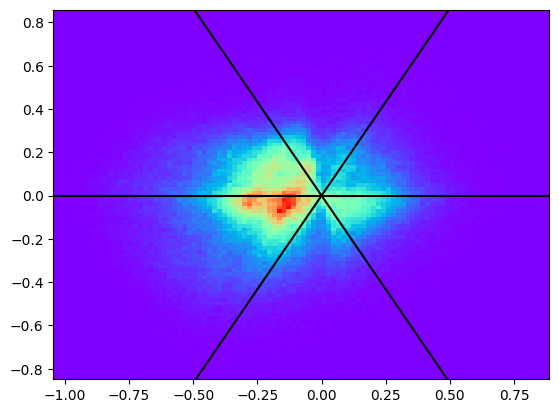

In [12]:
plt.hist2d(X,Y,bins=100,cmap='rainbow')
x1, y1 = [-10, 10], [0, 0]
plt.plot(x1,y1, color='black')
sixty = np.pi/3
x2, y2 = [-10*np.cos(sixty), 10*np.cos(sixty)], [10*np.sin(sixty), -10*np.sin(sixty)]
plt.plot(x2,y2, color='black')
x3, y3 = [10*np.cos(sixty), -10*np.cos(sixty)], [10*np.sin(sixty), -10*np.sin(sixty)]
plt.plot(x3,y3, color='black')

Try with another input file (for instance the generated MonteCarlo events at 5 or 10 GeV incident momentum) and check the differences.